In [2]:
%matplotlib_svg
import numpy as np

## ufunc函数

In [3]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
y

array([  0.00000000e+00,   6.42787610e-01,   9.84807753e-01,
         8.66025404e-01,   3.42020143e-01,  -3.42020143e-01,
        -8.66025404e-01,  -9.84807753e-01,  -6.42787610e-01,
        -2.44929360e-16])

In [4]:
t = np.sin(x, out=x)
t is x

True

In [4]:
import math

x = [i * 0.001 for i in xrange(1000000)]

def sin_math(x):
    for i, t in enumerate(x):
        x[i] = math.sin(t)

def sin_numpy(x):
    np.sin(x, x)

def sin_numpy_loop(x):
    for i, t in enumerate(x):
        x[i] = np.sin(t)

xl = x[:]
%time sin_math(x)

xa = np.array(x)
%time sin_numpy(xa)

xl = x[:]
%time sin_numpy_loop(x)

Wall time: 302 ms
Wall time: 30 ms
Wall time: 1.28 s


In [5]:
%C type(math.sin(0.5)); type(np.sin(0.5))

type(math.sin(0.5))  type(np.sin(0.5))
-------------------  -----------------
float                numpy.float64    


In [8]:
a = np.arange(6.0).reshape(2, 3)
print((a.item(1, 2), type(a.item(1, 2)), type(a[1, 2])))

5.0 <type 'float'> <type 'numpy.float64'>


### 四则运算

In [11]:
a = np.arange(0, 4)
b = np.arange(1, 5)
np.add(a, b)

array([1, 3, 5, 7])

In [8]:
np.add(a, b, a)
a

array([1, 3, 5, 7])

### 比较和布尔运算

In [9]:
np.array([1, 2, 3]) < np.array([3, 2, 1])

array([ True, False, False], dtype=bool)

In [12]:
a = np.arange(5)
b = np.arange(4, -1, -1)
print((a == b))
print((a > b))
print((np.logical_or(a == b, a > b)))  # 和 a>=b 相同

[False False  True False False]
[False False False  True  True]
[False False  True  True  True]


In [13]:
a == b and a > b

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [12]:
%C np.any(a == b); np.any(a == b) and np.any(a > b)

np.any(a == b)  np.any(a == b) and np.any(a > b)
--------------  --------------------------------
True            True                            


In [13]:
(a == b) | (a > b)

array([False, False,  True,  True,  True], dtype=bool)

In [14]:
~ np.arange(5)

array([-1, -2, -3, -4, -5])

In [15]:
~ np.arange(5, dtype=np.uint8)

array([255, 254, 253, 252, 251], dtype=uint8)

### 自定义ufunc函数

In [14]:
def triangle_wave(x, c, c0, hc):
    x = x - int(x) # 三角波的周期为1，因此只取x坐标的小数部分进行计算
    if x >= c: r = 0.0
    elif x < c0: r = x / c0 * hc
    else: r = (c-x) / (c-c0) * hc
    return r

In [15]:
x = np.linspace(0, 2, 1000)
y1 = np.array([triangle_wave(t, 0.6, 0.4, 1.0) for t in x])

In [16]:
triangle_ufunc1 = np.frompyfunc(triangle_wave, 4, 1)
y2 = triangle_ufunc1(x, 0.6, 0.4, 1.0)

In [17]:
%C y2.dtype; y2.astype(np.float).dtype

 y2.dtype   y2.astype(np.float).dtype
----------  -------------------------
dtype('O')  dtype('float64')         


In [18]:
triangle_ufunc2 = np.vectorize(triangle_wave, otypes=[np.float])
y3 = triangle_ufunc2(x, 0.6, 0.4, 1.0)

In [19]:
%C np.all(y1 == y2); np.all(y2 == y3)

np.all(y1 == y2)  np.all(y2 == y3)
----------------  ----------------
True              True            


### 广播

In [20]:
a = np.arange(0, 60, 10).reshape(-1, 1)
%C a; a.shape

  a     a.shape
------  -------
[[ 0],  (6, 1) 
 [10],         
 [20],         
 [30],         
 [40],         
 [50]]         


In [21]:
b = np.arange(0, 5)
%C b; b.shape

       b         b.shape
---------------  -------
[0, 1, 2, 3, 4]  (5,)   


In [22]:
c = a + b
%C c; c.shape

          c             c.shape
----------------------  -------
[[ 0,  1,  2,  3,  4],  (6, 5) 
 [10, 11, 12, 13, 14],         
 [20, 21, 22, 23, 24],         
 [30, 31, 32, 33, 34],         
 [40, 41, 42, 43, 44],         
 [50, 51, 52, 53, 54]]         


In [23]:
b.shape = 1, 5
%C b; b.shape

        b          b.shape
-----------------  -------
[[0, 1, 2, 3, 4]]  (1, 5) 


In [24]:
b = b.repeat(6, axis=0)
%C b; b.shape

        b          b.shape
-----------------  -------
[[0, 1, 2, 3, 4],  (6, 5) 
 [0, 1, 2, 3, 4],         
 [0, 1, 2, 3, 4],         
 [0, 1, 2, 3, 4],         
 [0, 1, 2, 3, 4],         
 [0, 1, 2, 3, 4]]         


In [25]:
a = a.repeat(5, axis=1)
%C a; a.shape

          a             a.shape
----------------------  -------
[[ 0,  0,  0,  0,  0],  (6, 5) 
 [10, 10, 10, 10, 10],         
 [20, 20, 20, 20, 20],         
 [30, 30, 30, 30, 30],         
 [40, 40, 40, 40, 40],         
 [50, 50, 50, 50, 50]]         


In [26]:
x, y = np.ogrid[:5, :5]
%C x; y

  x            y        
-----  -----------------
[[0],  [[0, 1, 2, 3, 4]]
 [1],                   
 [2],                   
 [3],                   
 [4]]                   


In [27]:
x, y = np.mgrid[:5, :5]
%C x; y

        x                  y        
-----------------  -----------------
[[0, 0, 0, 0, 0],  [[0, 1, 2, 3, 4],
 [1, 1, 1, 1, 1],   [0, 1, 2, 3, 4],
 [2, 2, 2, 2, 2],   [0, 1, 2, 3, 4],
 [3, 3, 3, 3, 3],   [0, 1, 2, 3, 4],
 [4, 4, 4, 4, 4]]   [0, 1, 2, 3, 4]]


In [28]:
x, y = np.ogrid[:1:4j, :1:3j]
%C x; y   

       x                  y          
---------------  --------------------
[[ 0.        ],  [[ 0. ,  0.5,  1. ]]
 [ 0.33333333],                      
 [ 0.66666667],                      
 [ 1.        ]]                      


In [29]:
x, y = np.ogrid[-2:2:20j, -2:2:20j]
z = x * np.exp( - x**2 - y**2)

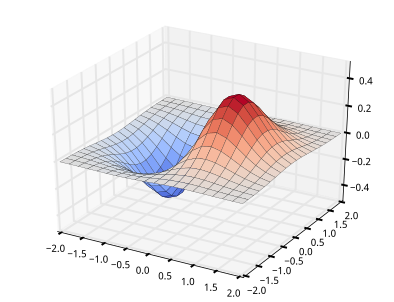

In [30]:
#%figonly=使用`ogrid`计算二元函数的曲面
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pylab as pl

fig = pl.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap="coolwarm", linewidth=0.2)

In [31]:
a = np.arange(4)
%C a[None, :]; a[:, None]

  a[None, :]    a[:, None]
--------------  ----------
[[0, 1, 2, 3]]  [[0],     
                 [1],     
                 [2],     
                 [3]]     


In [32]:
x = np.array([0, 1, 4, 10])    
y = np.array([2, 3, 8])   
x[None, :] + y[:, None]

array([[ 2,  3,  6, 12],
       [ 3,  4,  7, 13],
       [ 8,  9, 12, 18]])

In [33]:
gy, gx = np.ix_(y, x) 
%C gx; gy; gx + gy

        gx            gy        gx + gy      
------------------  -----  ------------------
[[ 0,  1,  4, 10]]  [[2],  [[ 2,  3,  6, 12],
                     [3],   [ 3,  4,  7, 13],
                     [8]]   [ 8,  9, 12, 18]]


### ufunc的方法

In [34]:
r1 = np.add.reduce([1, 2, 3])  # 1 + 2 + 3
r2 = np.add.reduce([[1, 2, 3], [4, 5, 6]], axis=1)  # (1+2+3),(4+5+6)
%C r1; r2

r1     r2   
--  --------
6   [ 6, 15]


In [35]:
a1 = np.add.accumulate([1, 2, 3])
a2 = np.add.accumulate([[1, 2, 3], [4, 5, 6]], axis=1)
%C a1; a2

    a1           a2      
---------  --------------
[1, 3, 6]  [[ 1,  3,  6],
            [ 4,  9, 15]]


In [37]:
a = np.array([1, 2, 3, 4])
result = np.add.reduceat(a, indices=[0, 1, 0, 2, 0, 3, 0])
result

array([ 1,  2,  3,  3,  6,  4, 10])

In [38]:
np.multiply.outer([1, 2, 3, 4, 5], [2, 3, 4])

array([[ 2,  3,  4],
       [ 4,  6,  8],
       [ 6,  9, 12],
       [ 8, 12, 16],
       [10, 15, 20]])